In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
using BSON: @save, @load
# include("leap_frog_definitions.jl")
# include("PSS_Definitions_Dimer_X.jl")
include("orbit_plots_leapfrog_dimer.jl")
@load "escape_data0_2000000000000_1250_1250.bson" SAVE_DATA

# Escapes for Energie Levels $H\in [.195,.25]$
## Brandon Behring


## Purpose of Document
The goal of this document is to show the behavior of trajectories on the Energy surfaces for $H$ in the interval $[.2,.21]$. This is the earliest in my simulations that I began to see some leapfrogging orbits escape to infinity

## Features of the new coordinates
* The new "dimer" coordinates resolve twp different time scales
* can naturally see the three stable fixed points representing the limit when dimers 'merge'
* two unstable fixed points, left-over from instabilities of the three-vortex problem?
* the braiding and walkabouts are now clearly separated
* the walkabouts stop existing around h=.2, perhaps now the leapfrogging orbits and now escape the stochastic region?


## The 'Dimer' Hamiltonian
Consider four vortices with $\Gamma_1=\Gamma_2=1$ and $\Gamma_3=\Gamma_4=-1$  located at $\pmb{r}_i=(x_i,y_i)$, the Hamiltonian can be written down explicitly as
\begin{equation}
\label{Ham}
   \begin{split}
\mathcal{H}&=-\frac{1}{4\pi} \log |\pmb{r}_4-\pmb{r}_3 |^2-\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_2 |^2+\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_3 |^2\\
&+\frac{1}{4\pi} \log |\pmb{r}_2-\pmb{r}_3 |^2+\frac{1}{4\pi} \log |\pmb{r}_1-\pmb{r}_4 |^2+\frac{1}{4\pi} \log |\pmb{r}_2-\pmb{r}_4 |^2.
\end{split}
\end{equation}


We wish to dimerize the two liked signed vortices. Switching to the center of vorticity of 1 and 2 of the positive vortices and 3 and 4  of the negative vortices 
\begin{equation}
\label{center}
\begin{aligned} 
\pmb{R}_{+}&=\frac{ \pmb{r}_1+\pmb{r}_2}{2}=(X_{+},Y_{+}),\\
\pmb{r}_{+}&=\pmb{r}_1-\pmb{r}_2=(x_{+},y_{+}).\\
\pmb{R}_{-}&=\frac{ \pmb{r}_3+\pmb{r}_4}{2}=(X_{-},Y_{-})\\
\pmb{r}_{-}&=\pmb{r}_3-\pmb{r}_4=(x_{-},y_{-}).
\end{aligned}
\end{equation} 
Note that since we have net circulation of zero, $\{ Q, P \}=\sum_i \Gamma_i=0$, the moment of vorticity is
\begin{equation}
\pmb{M}=(Q, P)=\sum_{i=1}^4 \Gamma_i \pmb{r}_i=\pmb{r}_1+\pmb{r}_2-(\pmb{r}_3+\pmb{r}_4)=2\left(\pmb{R}_{+} -\pmb{R}_{-}\right)
\end{equation}
has two independent conserved components, the quantities $Q$ and $P$.


We can make a new canonical system by taking
\begin{equation}
\begin{aligned}
q_1&= \frac{1}{\sqrt{2}}\left(x_1-x_2\right), &
q_2&=+\frac{1}{\sqrt{2}}\left(x_3-x_4\right),\\
p_1&=\frac{1}{\sqrt{2}} \left(y_1-y_2\right), &
p_2&=-\frac{1}{\sqrt{2}}\left(y_3-y_4\right),
\end{aligned}
\label{dimer variables}
\end{equation}

With this choice, the Poisson brackets are now normalized, i.e.  $\{q_i,p_j\}=\delta_{ij}$. This makes keep track of our canonical transformations simpler and allows us to define our ODEs just by the Hamiltonian.

 In the canonical variables, the Hamiltonian becomes,  to stick with staying in the reference frame of Aref\cite{ArefEckhardt} we will later choose $\pmb{M}=(0,2)$.
 \begin{equation}
\begin{split}
\label{Dimer_Hamiltonian}
H(q_1,q_2,p_1,p_2)&=
-\frac{1}{4\pi} \log \left(p_1^2+q_1^2\right) 
-\frac{1}{4\pi} \log \left(p_2^2+q_2^2\right) \\
&+ \frac{1}{4\pi} \log \left(2-2\sqrt{2}\left(p_1+p_2\right)+\left(p_1+p_2\right){}^2+\left(q_1-q_2\right)^2\right) \\
&+ \frac{1}{4\pi} \log \left(2+2\sqrt{2}\left(p_1+p_2\right)+\left(p_1+p_2\right){}^2+\left(q_1-q_2\right)^2\right)\\
&+ \frac{1}{4\pi} \log \left(2-2\sqrt{2}\left(p_1-p_2\right)+\left(p_1-p_2\right){}^2+\left(q_1+q_2\right)^2\right)\\
&+ \frac{1}{4\pi} \log \left(2+2\sqrt{2}\left(p_1-p_2\right)+\left(p_1-p_2\right){}^2+\left(q_1+q_2\right)^2\right)
\end{split}
\end{equation}

The initial coordinates for the leap frogging motion would be $q_1=q_2=0$ and $p_1=p_2$.

## The 'Aref-Eckhardt' Hamiltonian

The for of the dimer Hamiltonian suggest we look at the following transformation
\begin{equation}
\begin{aligned}
Q_1&=\frac{1}{\sqrt{2}} \left(q_1+q_2\right), &
Q_2&=\frac{1}{\sqrt{2}} \left(q_1-q_2\right),\\
P_1&=\frac{1}{\sqrt{2}} \left(p_1+p_2\right), &
P_2&=\frac{1}{\sqrt{2}} \left(p_1-p_2\right),
\end{aligned}
\label{aref_variables}
\end{equation}

which leads to Hamiltonian
 \begin{equation}
\begin{split}
\label{Aref_Hamiltonian}
4\pi H(Q_1,Q_2,P_1,P_2)&=
\log \left((Q_1+Q_2)^2+(P_1+P_2)^2\right)
+\log \left((Q_1-Q_2)^2+(P_1-P_2)^2\right)\\
&-\log \left(Q_1^2+(P_2-1)^2\right)
-\log\left(Q_1^2+(P_2+1)^2\right)\\
&-\log \left(Q_2^2+(P_1-1)^2\right)
-\log \left(Q_2^2+(P_1+1)^2\right).\\
\end{split}
\end{equation}

We often dealt with $\mathcal{H}=8 e^{-2\pi}$ given by
\begin{equation}
\label{Brandon_Aref_Hamiltonian}
\mathcal{H}(Q_1,Q_2,P_1,P_2)=\frac{1}{2} \sqrt{ \frac{\left((Q_1+Q_2)^2+(P_1+P_2)^2\right)\left((Q_1-Q_2)^2+(P_1-P_2)^2\right)}
{\left(Q_1^2+(P_2-1)^2\right)\left(Q_1^2+(P_2+1)^2\right)\left(Q_2^2+(P_1-1)^2\right) \left(Q_2^2+(P_1+1)^2\right)}}
\end{equation}

# For H=.2

Loading data and making hit tables-this will be improved. Right now this approach has a lot of vestigal features that can be cleaned up.

In [2]:
@load "escape_data0_2000000000000_1250_1250.bson" SAVE_DATA
num_until_exit=SAVE_DATA["escape_times"];
N=length(num_until_exit); 
mesh=SAVE_DATA["mesh"]; 
mesh_list = reshape(mesh, 1, :);


Q_0 = zeros(0);P_0 = zeros(0)
Q_1 = zeros(0);P_1 = zeros(0)
Q_2 = zeros(0);P_2 = zeros(0)
Q_3 = zeros(0);P_3 = zeros(0)
Q_4 = zeros(0);P_4 = zeros(0)
Q_5 = zeros(0);P_5 = zeros(0)
Q_b = zeros(0);P_b = zeros(0);

In [3]:
Create list of hits.

In [4]:
for i = 1:N
    Q, P = mesh_list[i]
    if num_until_exit[i] == -2
        push!(Q_b, Q)
        push!(P_b, P)
        elseif num_until_exit[i] == 0
        push!(Q_0, Q)
        push!(P_0, P)
        elseif num_until_exit[i] == 1
        push!(Q_1, Q)
        push!(P_1, P)
        elseif num_until_exit[i] == 2
        push!(Q_2, Q)
        push!(P_2, P)
        elseif num_until_exit[i] == 3
        push!(Q_3, Q)
        push!(P_3, P)
        elseif num_until_exit[i] == 4
        push!(Q_4, Q)
        push!(P_4, P)
        elseif num_until_exit[i] == 5
        push!(Q_5, Q)
        push!(P_5, P)
    end
end

Plotting hits before escape- need to add legend. Below I break down each hit just for clarity. I will not do this for the other examples.

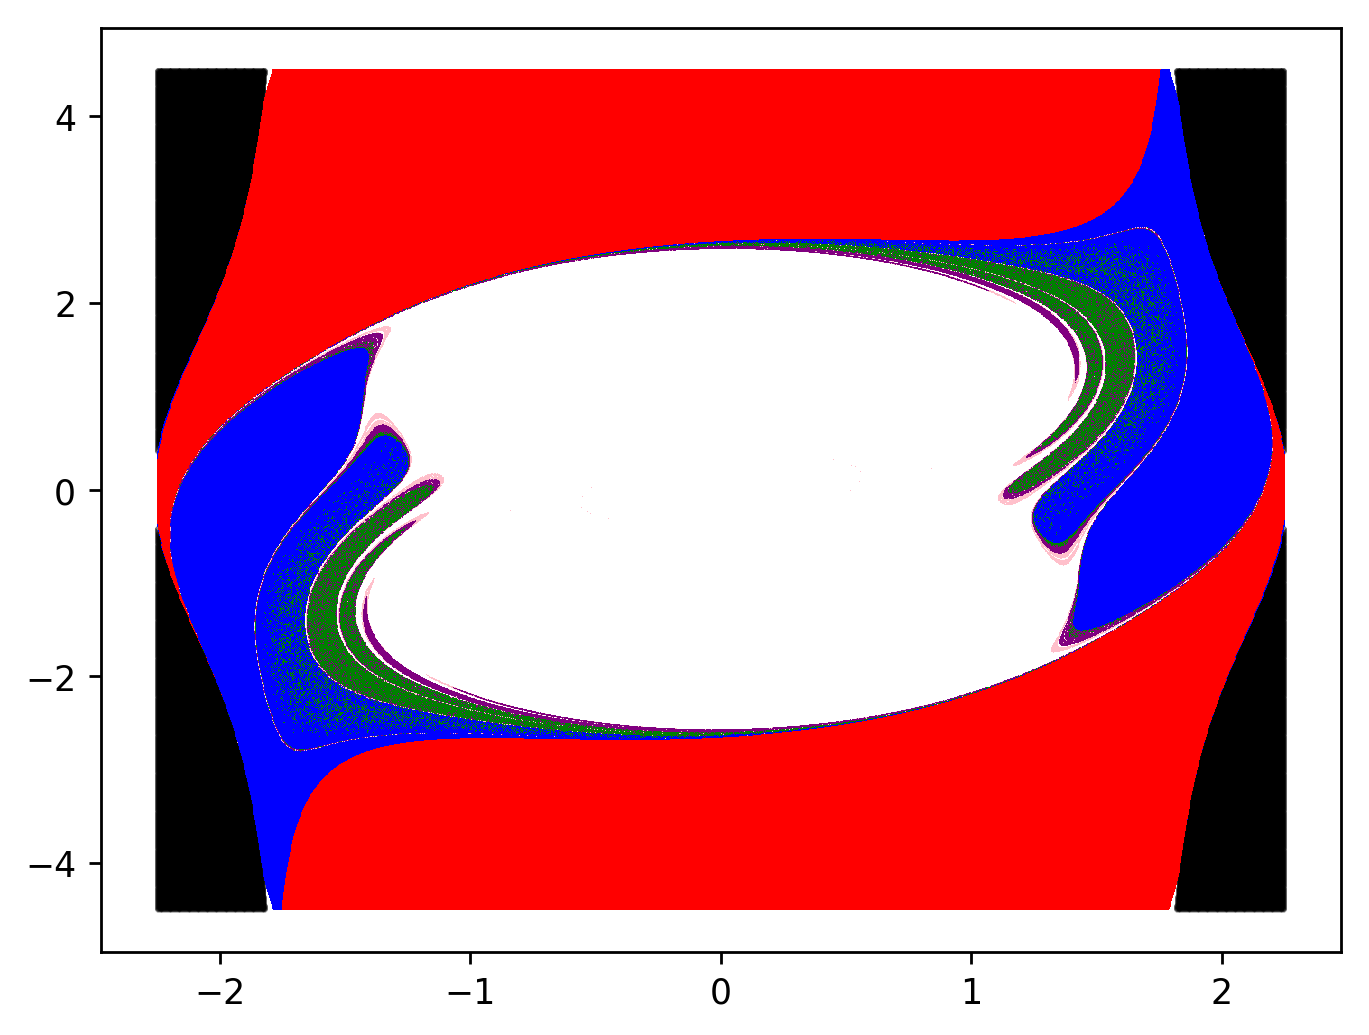

In [5]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_0,P_0, ",",c=:red)
plot(-Q_0,-P_0, ",",c=:red);

plot(Q_1,P_1, ",",c=:blue)
plot(-Q_1,-P_1, ",",c=:blue);

plot(Q_2,P_2, ",",c=:green)
plot(-Q_2,-P_2, ",",c=:green);

plot(Q_3,P_3, ",",c=:orange)
plot(-Q_3,-P_3, ",",c=:orange);

plot(Q_4,P_4, ",",c=:pink)
plot(-Q_4,-P_4, ",",c=:pink);

plot(Q_3,P_3, ",",c=:purple)
plot(-Q_3,-P_3, ",",c=:purple);

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0");

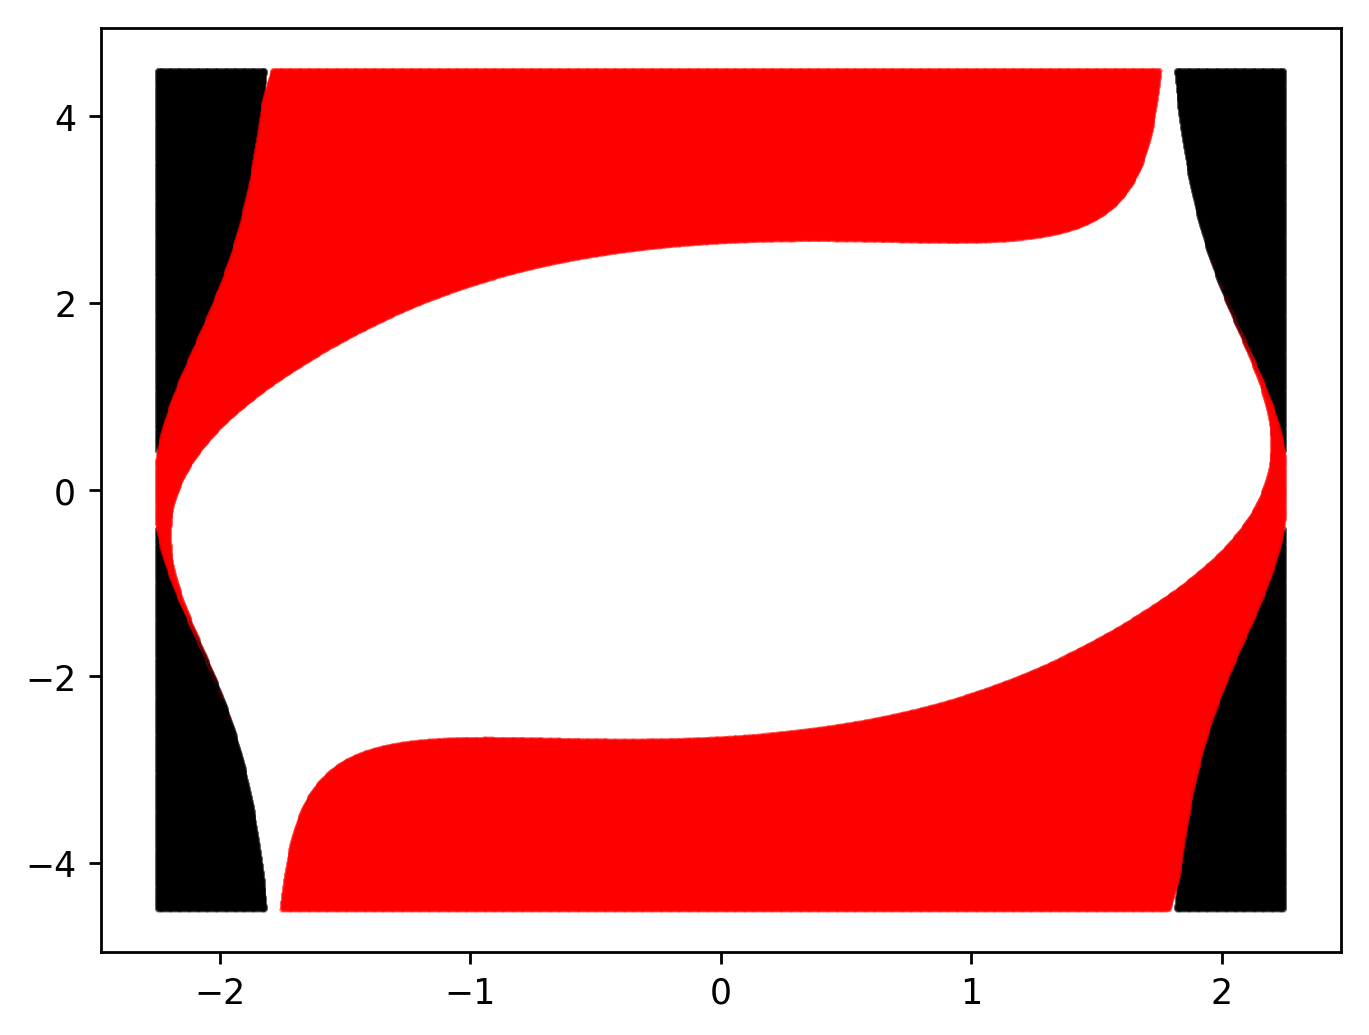

In [6]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_0,P_0, ".",markersize=.1, c=:red)
plot(-Q_0,-P_0,".",markersize=.1,c=:red);

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 IMMEDIATE ESCAPE");

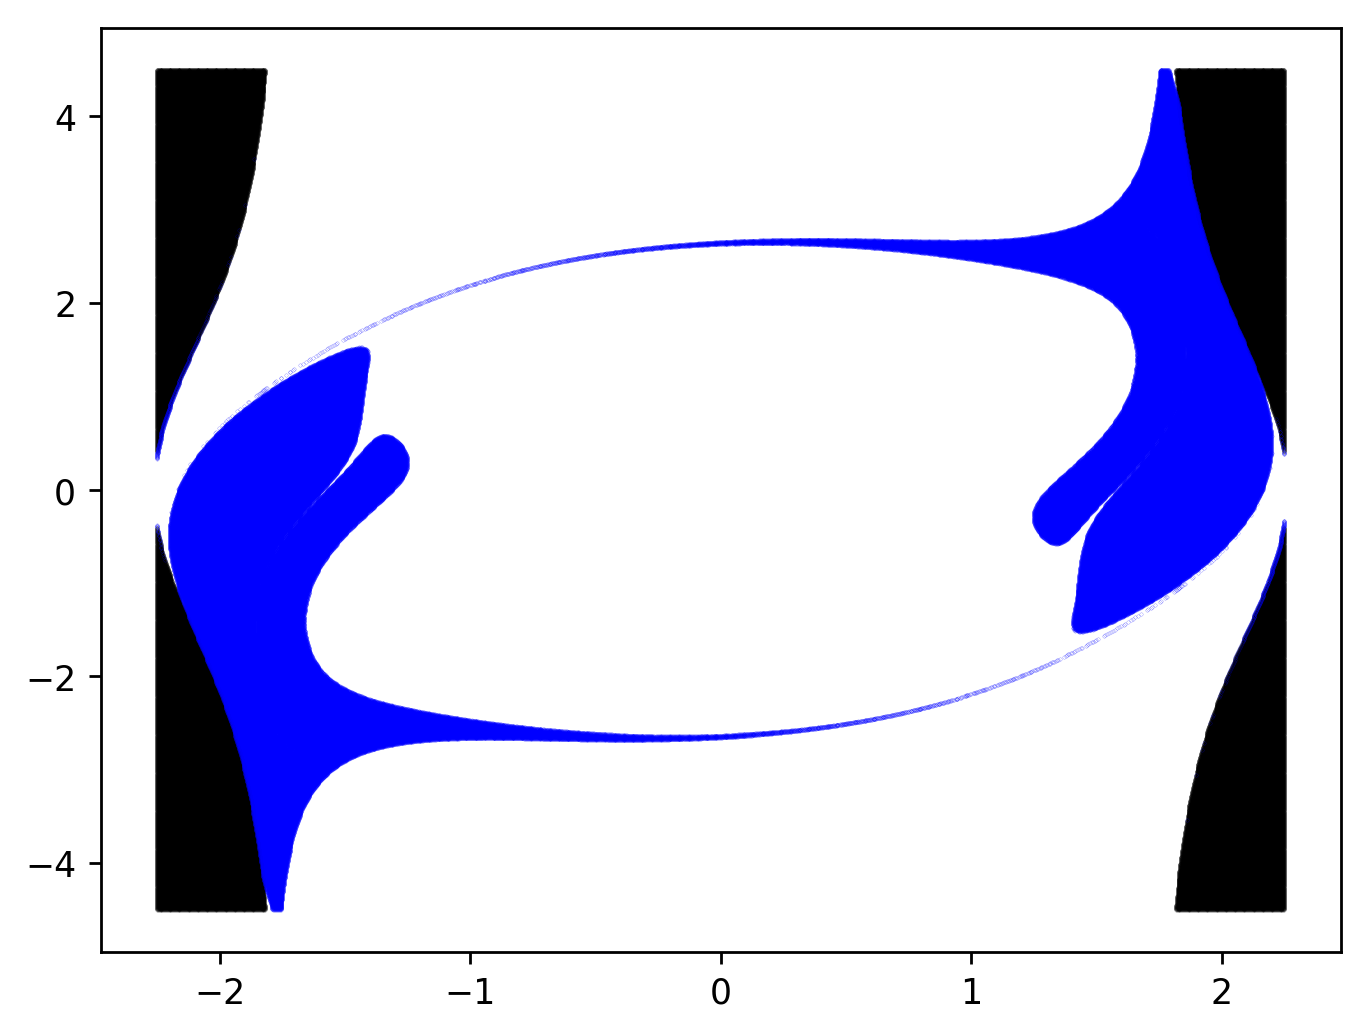

In [7]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_1,P_1, ".",markersize=.1, c=:blue)
plot(-Q_1,-P_1,".",markersize=.1,c=:blue);
xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits once then ESCAPE");


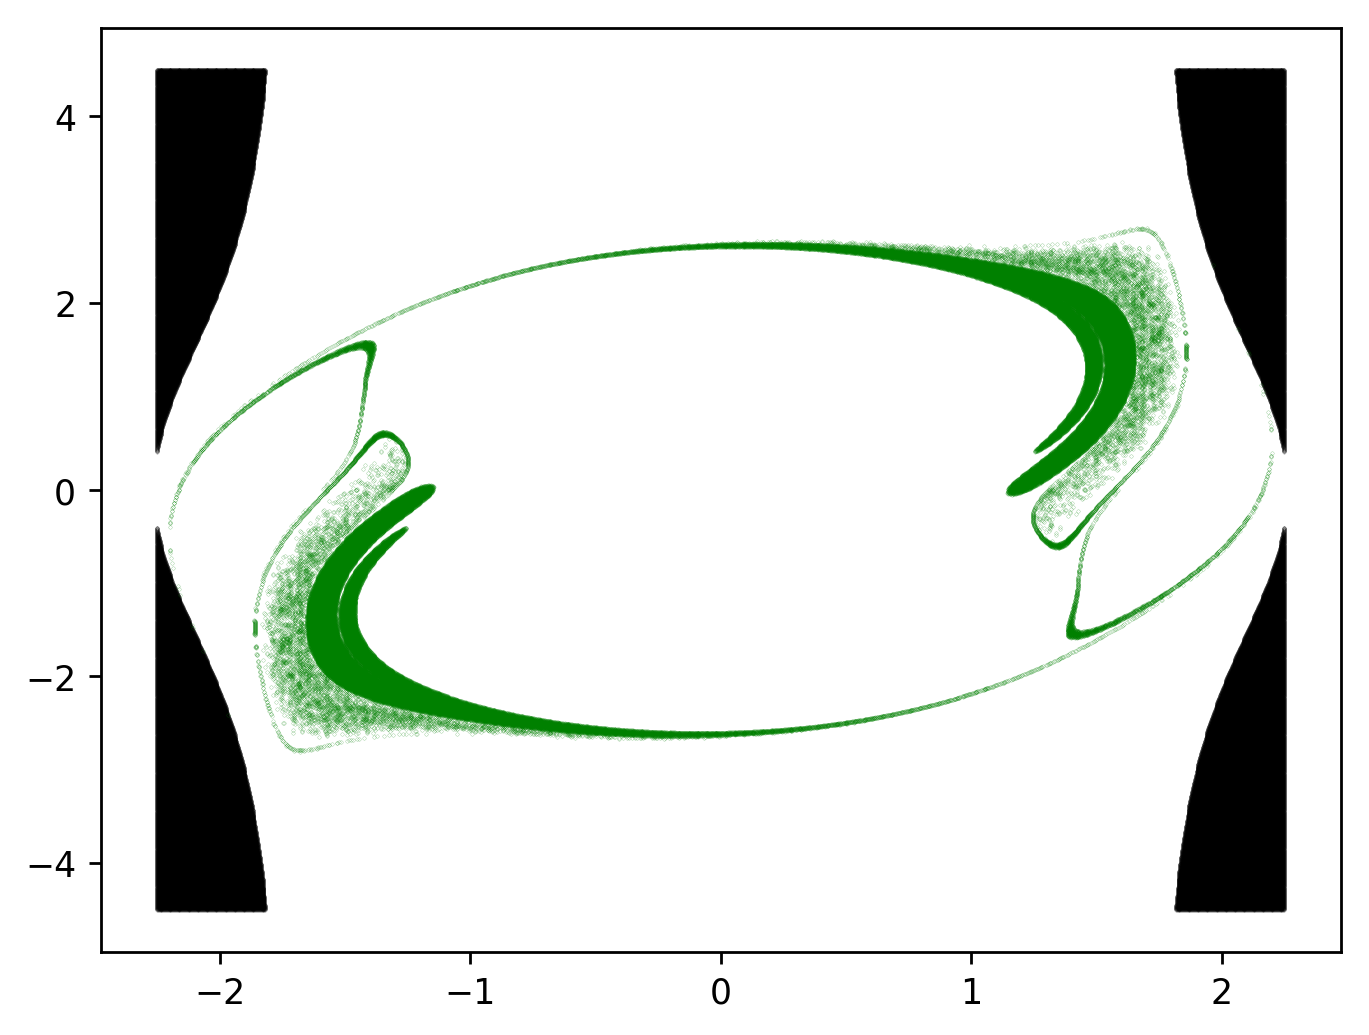

In [8]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_2,P_2, ".",markersize=.1, c=:green)
plot(-Q_2,-P_2,".",markersize=.1,c=:green)
xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits twice then ESCAPE");

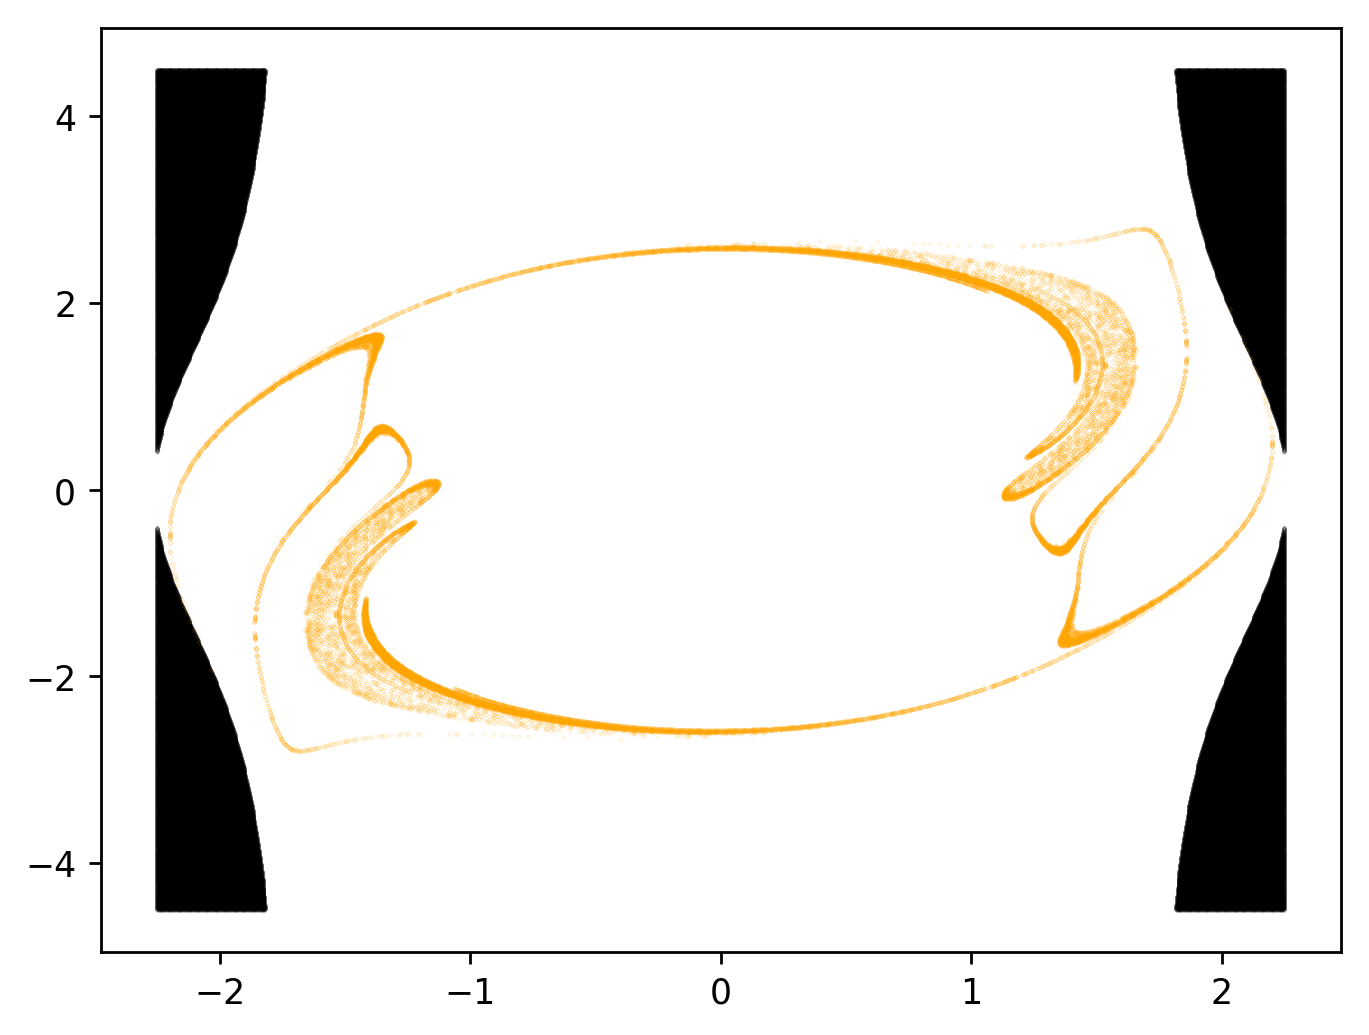

In [9]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_3,P_3, ".",markersize=.1, c=:orange)
plot(-Q_3,-P_3,".",markersize=.1,c=:orange);

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits three times then ESCAPE")

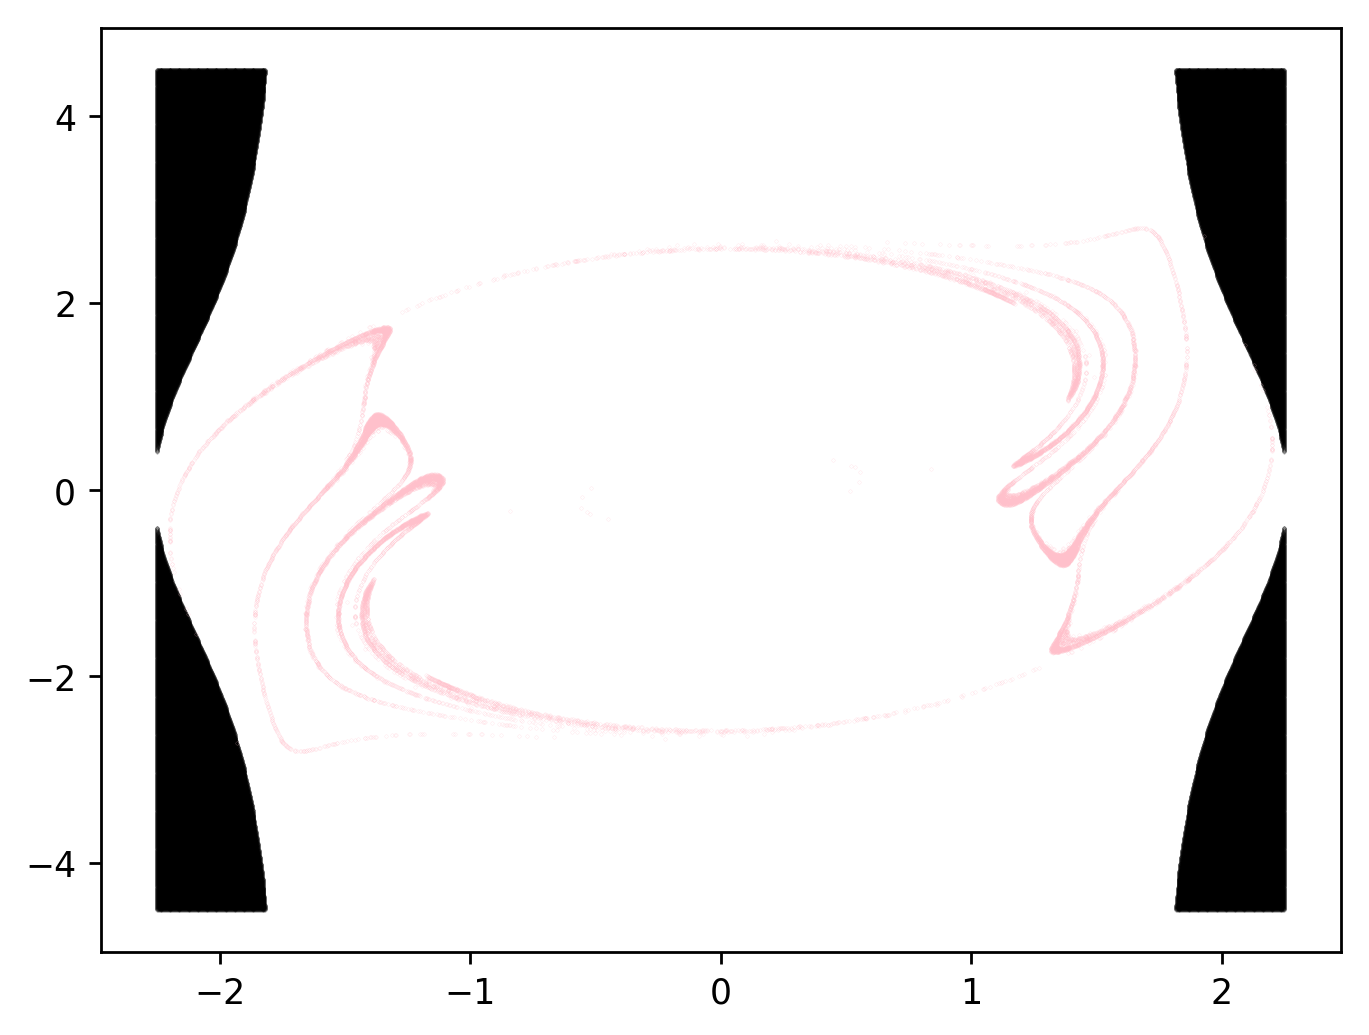

In [10]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_4,P_4, ".",markersize=.1, c=:pink)
plot(-Q_4,-P_4,".",markersize=.1,c=:pink);

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits four times then ESCAPE");

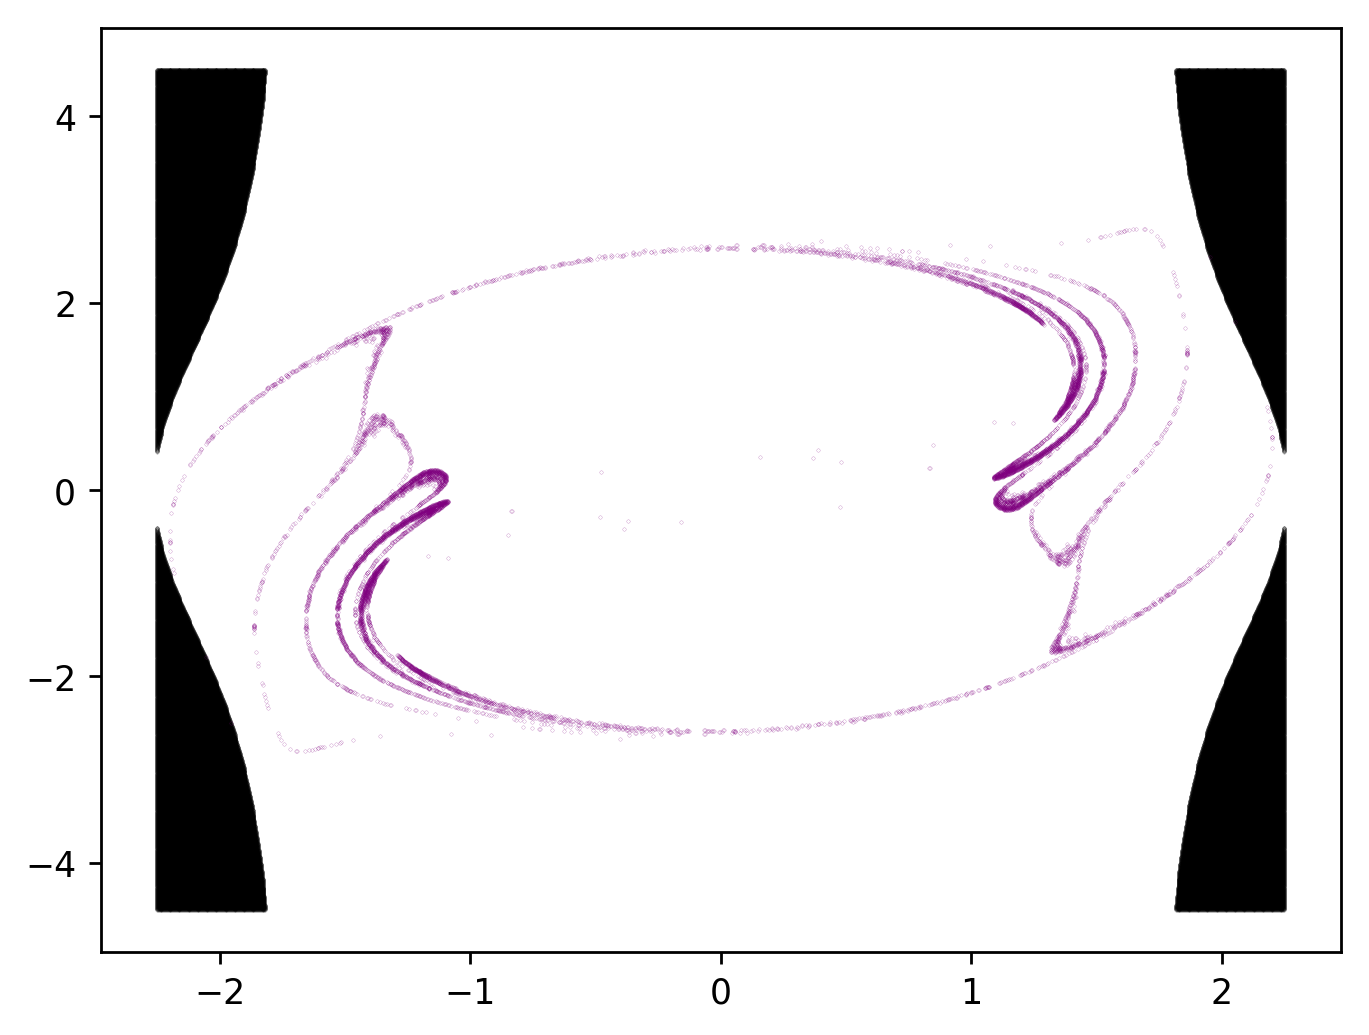

In [11]:
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_5,P_5, ".",markersize=.1, c=:purple)
plot(-Q_5,-P_5,".",markersize=.1,c=:purple);

xlabel("q2")
ylabel("p2")
title("H=.2, PSS when q1=0 hits five times then ESCAPE");

In [ ]:
@load "escape_data0_2100000000000_2000_2000.bson" SAVE_DATA


In [21]:
@load "escape_data0_21000000_1000.bson" SAVE_DATA
num_until_exit=SAVE_DATA["escape_times"]; 
ArrP=SAVE_DATA["ArrP"]; 
ArrQ=SAVE_DATA["ArrQ"]; 


KeyError: KeyError: key "escape_times" not found

In [ ]:
height=ArrP[end]
width=ArrQ[end]

In [20]:
SAVE_DATA

Dict{Any,Any} with 1000000 entries:
  (3.41341, -0.503003)  => 36.3219
  (2.60761, -0.798298)  => 27.5311
  (1.001, -0.808308)    => 54.5982
  (2.94795, -1.65415)   => 15.9862
  (1.91692, -0.928428)  => 54.5982
  (4.61962, -0.217718)  => 15.078
  (1.01101, -0.988488)  => 54.5982
  (2.52753, 0.978478)   => 46.9896
  (2.36737, -0.367868)  => 54.5982
  (1.65165, -1.42893)   => 54.5982
  (3.11311, -1.52402)   => 15.912
  (3.68368, -1.67417)   => 9.91012
  (3.72873, -2.44494)   => NaN
  (2.29229, -0.538038)  => 54.5982
  (3.01301, 1.02352)    => 52.5549
  (4.75475, -2.2047)    => NaN
  (3.95896, -0.0375375) => 30.074
  (1.44645, -0.242743)  => 54.5982
  (4.53954, -0.0375375) => 28.0819
  (3.44344, 0.267768)   => 28.7719
  (1.58659, 0.638138)   => 54.5982
  (3.49349, -1.93944)   => NaN
  (0.785786, 0.548048)  => 54.5982
  (4.6046, -0.467968)   => 7.3024
  (2.93794, -1.97447)   => NaN
  ⋮                     => ⋮

# For E=.21

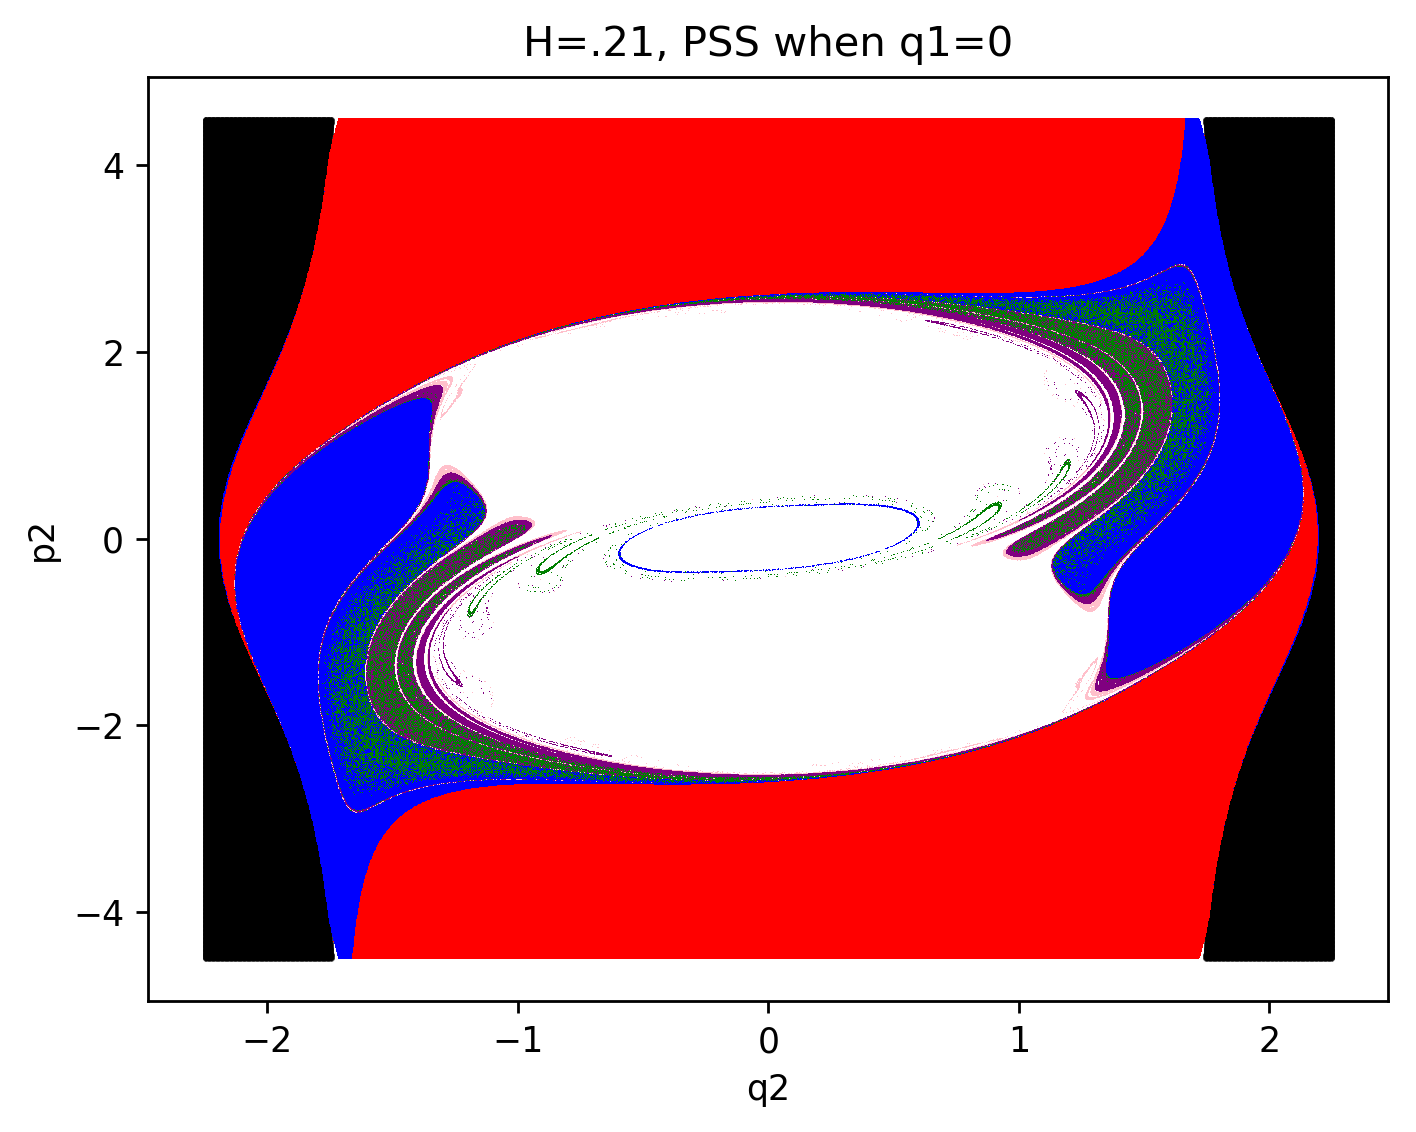

In [18]:
@load "escape_data0_2100000000000_2000_2000.bson" SAVE_DATA
Q_0 = zeros(0);P_0 = zeros(0)
Q_1 = zeros(0);P_1 = zeros(0)
Q_2 = zeros(0);P_2 = zeros(0)
Q_3 = zeros(0);P_3 = zeros(0)
Q_4 = zeros(0);P_4 = zeros(0)
Q_5 = zeros(0);P_5 = zeros(0)
Q_b = zeros(0);P_b = zeros(0)
num_until_exit=SAVE_DATA["escape_times"]; 
N=length(num_until_exit); 
mesh=SAVE_DATA["mesh"]; 
mesh_list = reshape(mesh, 1, :);
for i = 1:N
    Q, P = mesh_list[i]
    if num_until_exit[i] == -2
        push!(Q_b, Q)
        push!(P_b, P)
        elseif num_until_exit[i] == 0
        push!(Q_0, Q)
        push!(P_0, P)
        elseif num_until_exit[i] == 1
        push!(Q_1, Q)
        push!(P_1, P)
        elseif num_until_exit[i] == 2
        push!(Q_2, Q)
        push!(P_2, P)
        elseif num_until_exit[i] == 3
        push!(Q_3, Q)
        push!(P_3, P)
        elseif num_until_exit[i] == 4
        push!(Q_4, Q)
        push!(P_4, P)
        elseif num_until_exit[i] == 5
        push!(Q_5, Q)
        push!(P_5, P)
    end
end
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_0,P_0, ",",c=:red)
plot(-Q_0,-P_0, ",",c=:red);

plot(Q_1,P_1, ",",c=:blue)
plot(-Q_1,-P_1, ",",c=:blue);

plot(Q_2,P_2, ",",c=:green)
plot(-Q_2,-P_2, ",",c=:green);

plot(Q_3,P_3, ",",c=:orange)
plot(-Q_3,-P_3, ",",c=:orange);

plot(Q_4,P_4, ",",c=:pink)
plot(-Q_4,-P_4, ",",c=:pink);

plot(Q_3,P_3, ",",c=:purple)
plot(-Q_3,-P_3, ",",c=:purple);

xlabel("q2")
ylabel("p2")
title("H=.21, PSS when q1=0");

# For E=.25

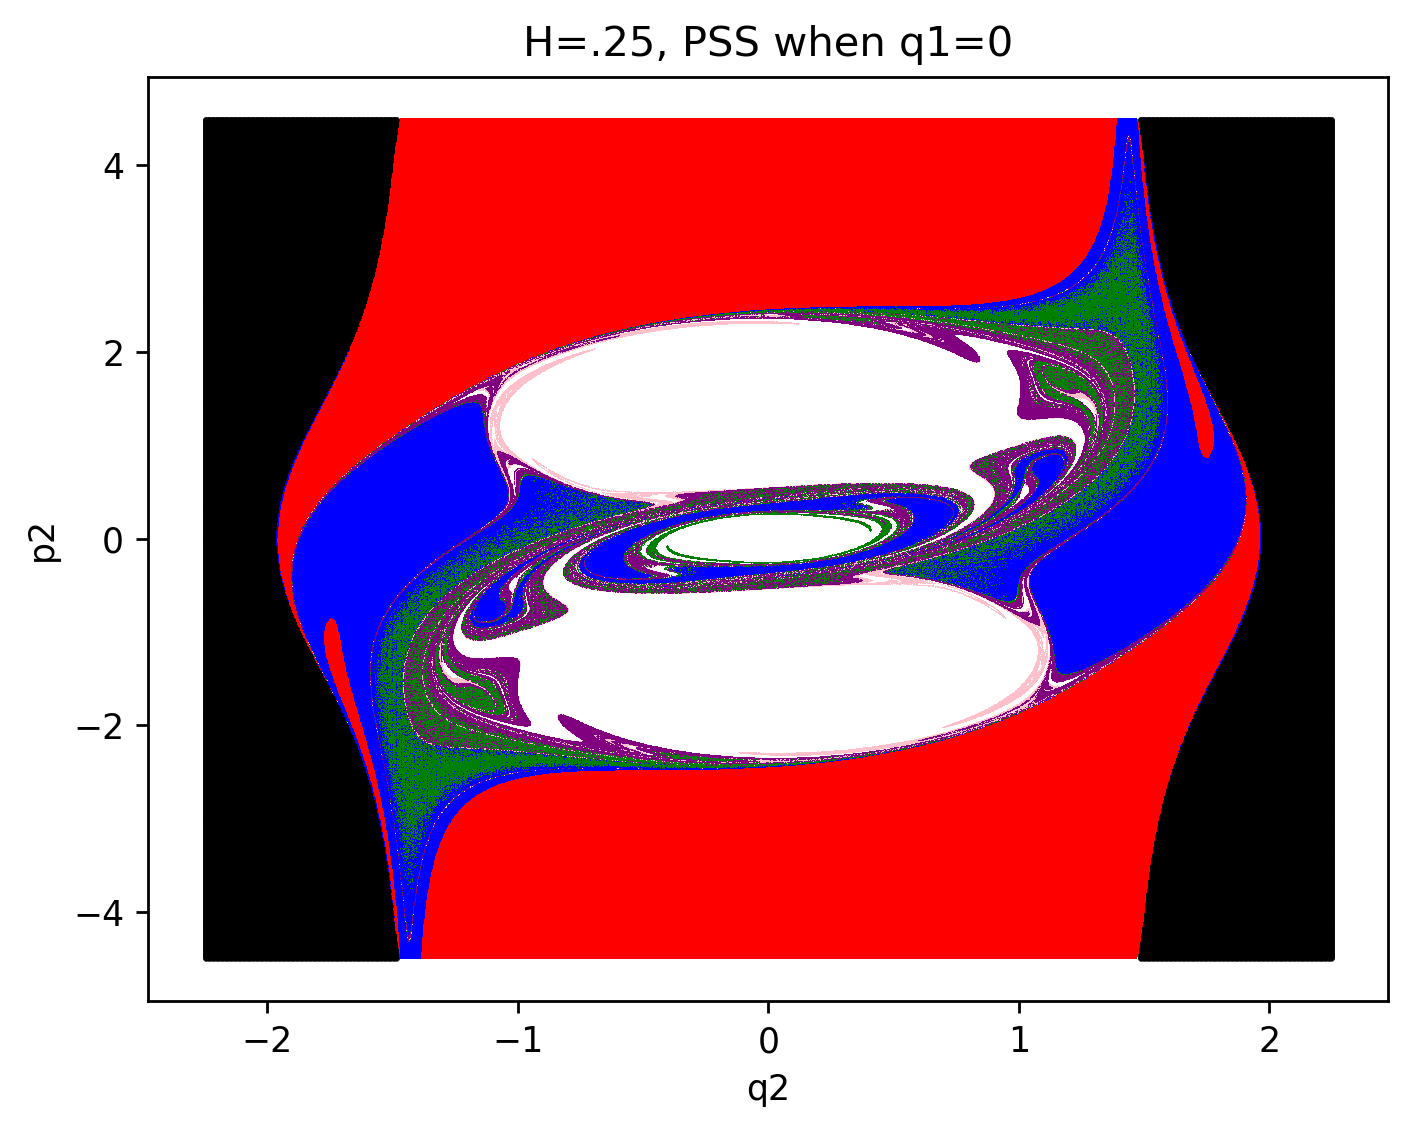

PyObject Text(0.5, 1.0, 'H=.25, PSS when q1=0')

In [15]:
@load "escape_data0_2500000000000_2000_2000.bson" SAVE_DATA
Q_0 = zeros(0);P_0 = zeros(0)
Q_1 = zeros(0);P_1 = zeros(0)
Q_2 = zeros(0);P_2 = zeros(0)
Q_3 = zeros(0);P_3 = zeros(0)
Q_4 = zeros(0);P_4 = zeros(0)
Q_5 = zeros(0);P_5 = zeros(0)
Q_b = zeros(0);P_b = zeros(0)
num_until_exit=SAVE_DATA["escape_times"]; 
N=length(num_until_exit); 
mesh=SAVE_DATA["mesh"]; 
mesh_list = reshape(mesh, 1, :);
for i = 1:N
    Q, P = mesh_list[i]
    if num_until_exit[i] == -2
        push!(Q_b, Q)
        push!(P_b, P)
        elseif num_until_exit[i] == 0
        push!(Q_0, Q)
        push!(P_0, P)
        elseif num_until_exit[i] == 1
        push!(Q_1, Q)
        push!(P_1, P)
        elseif num_until_exit[i] == 2
        push!(Q_2, Q)
        push!(P_2, P)
        elseif num_until_exit[i] == 3
        push!(Q_3, Q)
        push!(P_3, P)
        elseif num_until_exit[i] == 4
        push!(Q_4, Q)
        push!(P_4, P)
        elseif num_until_exit[i] == 5
        push!(Q_5, Q)
        push!(P_5, P)
    end
end
figure(dpi=250)

plot(Q_b,P_b, ".",markersize=.1,c="k")
plot(-Q_b,-P_b, ".",markersize=.1,c="k");

plot(Q_0,P_0, ",",c=:red)
plot(-Q_0,-P_0, ",",c=:red);

plot(Q_1,P_1, ",",c=:blue)
plot(-Q_1,-P_1, ",",c=:blue);

plot(Q_2,P_2, ",",c=:green)
plot(-Q_2,-P_2, ",",c=:green);

plot(Q_3,P_3, ",",c=:orange)
plot(-Q_3,-P_3, ",",c=:orange);

plot(Q_4,P_4, ",",c=:pink)
plot(-Q_4,-P_4, ",",c=:pink);

plot(Q_3,P_3, ",",c=:purple)
plot(-Q_3,-P_3, ",",c=:purple);

xlabel("q2")
ylabel("p2")
title("H=.25, PSS when q1=0");

# H=.18

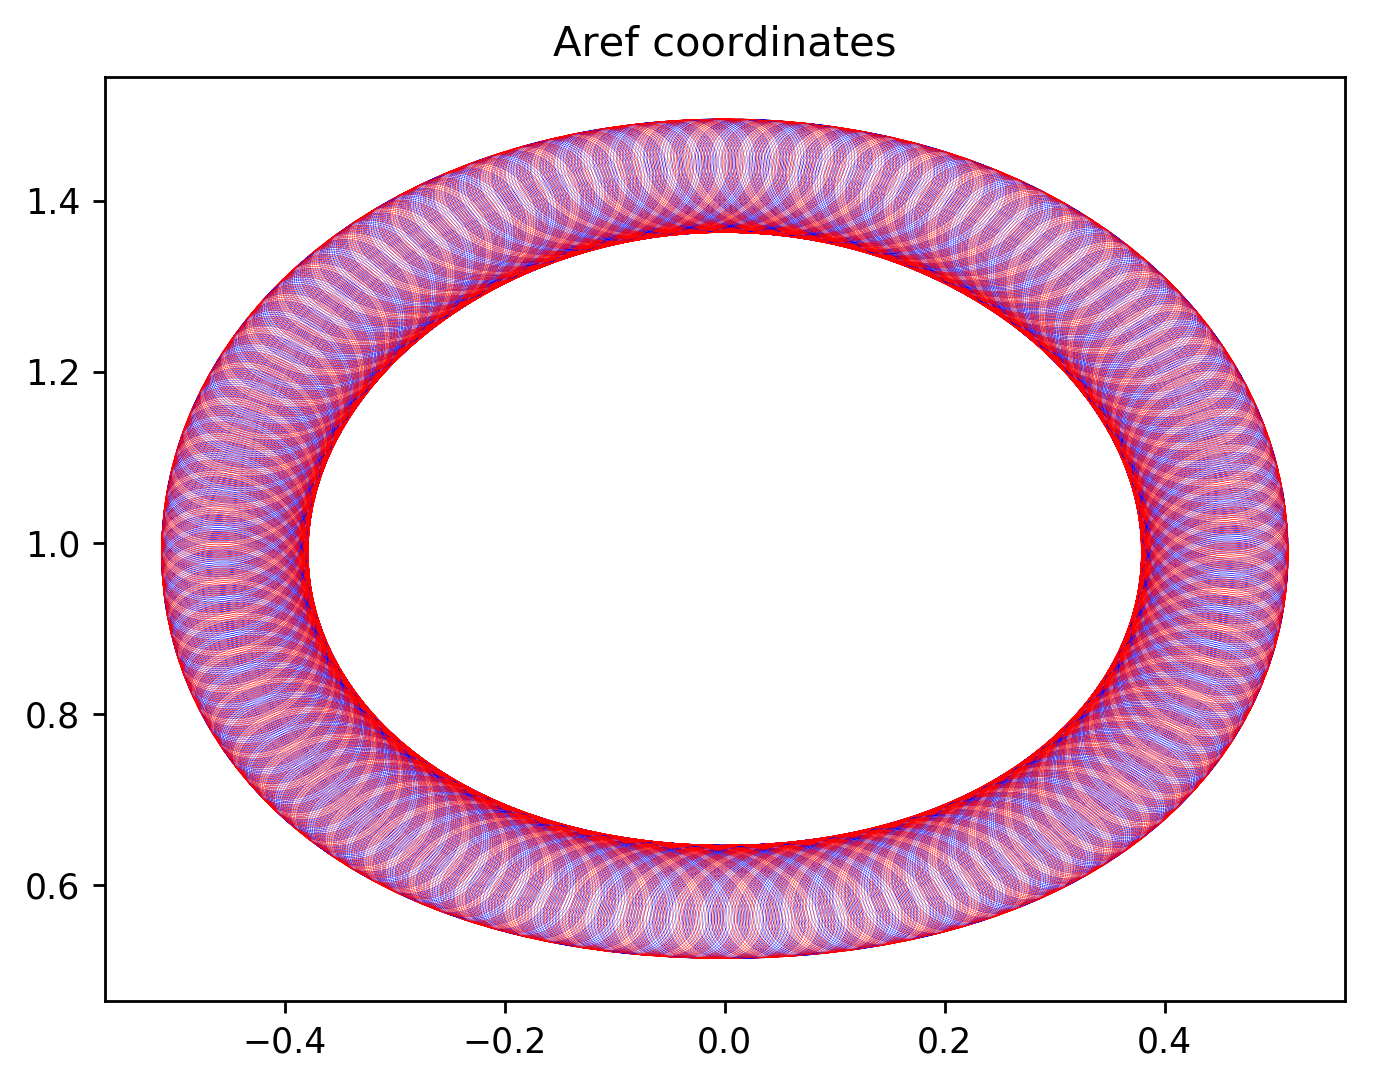

In [30]:
H=.18
max_time=105
q2=.1
p2=0
plot_orbits_leapfrog_aref(H,max_time, q2,p2);

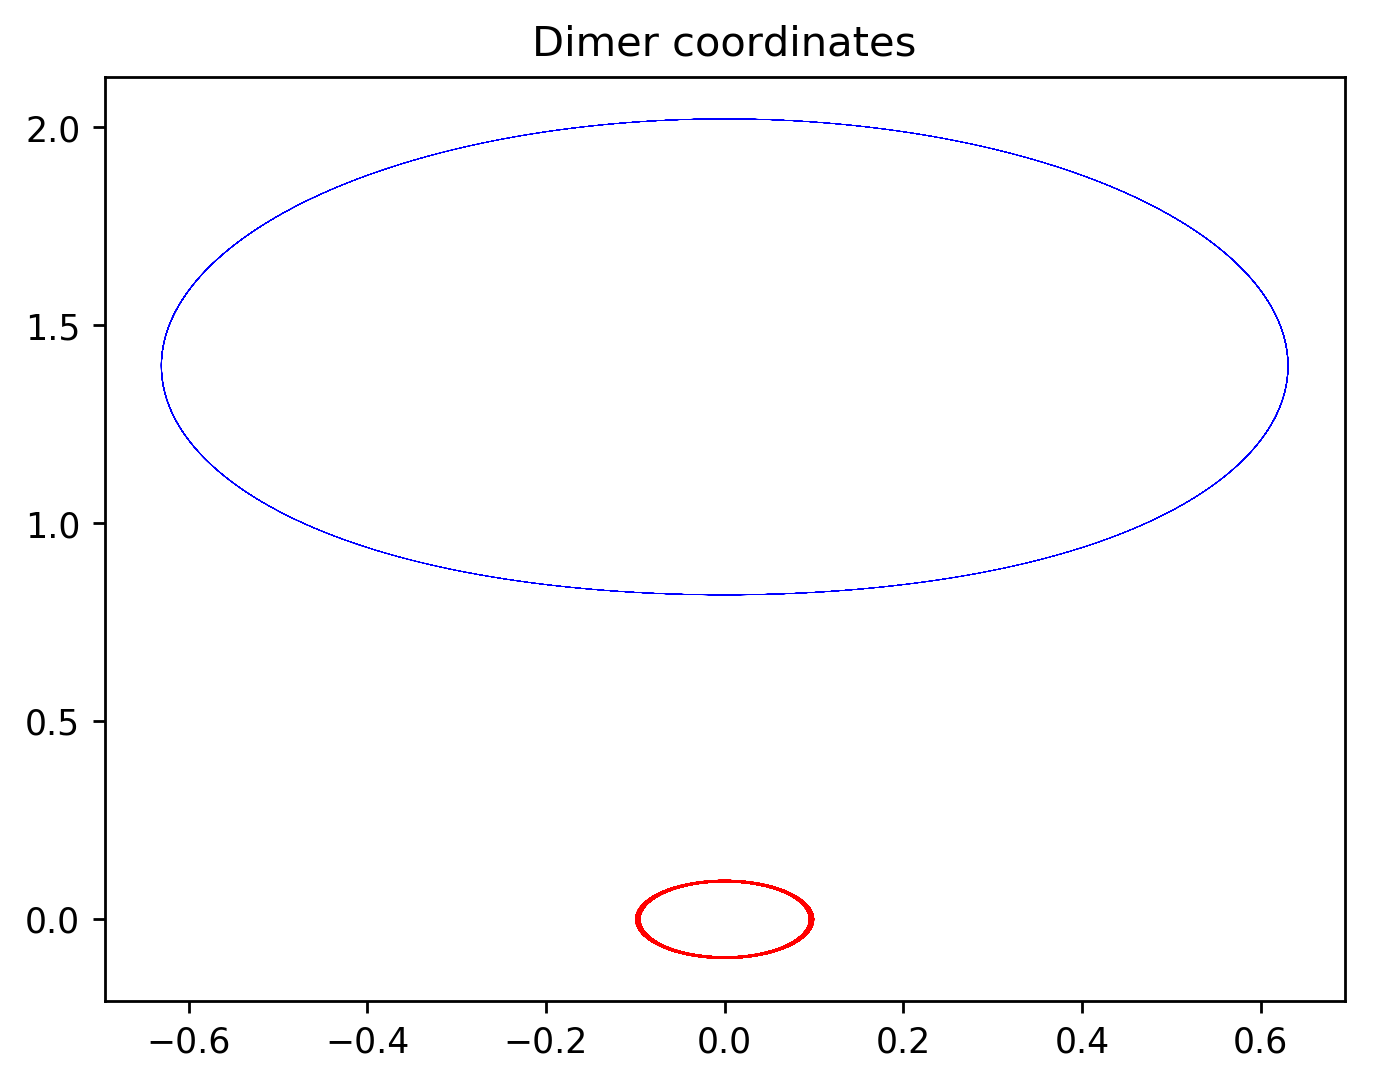

In [31]:
plot_orbits_leapfrog_dimer(H,max_time, q2,p2);

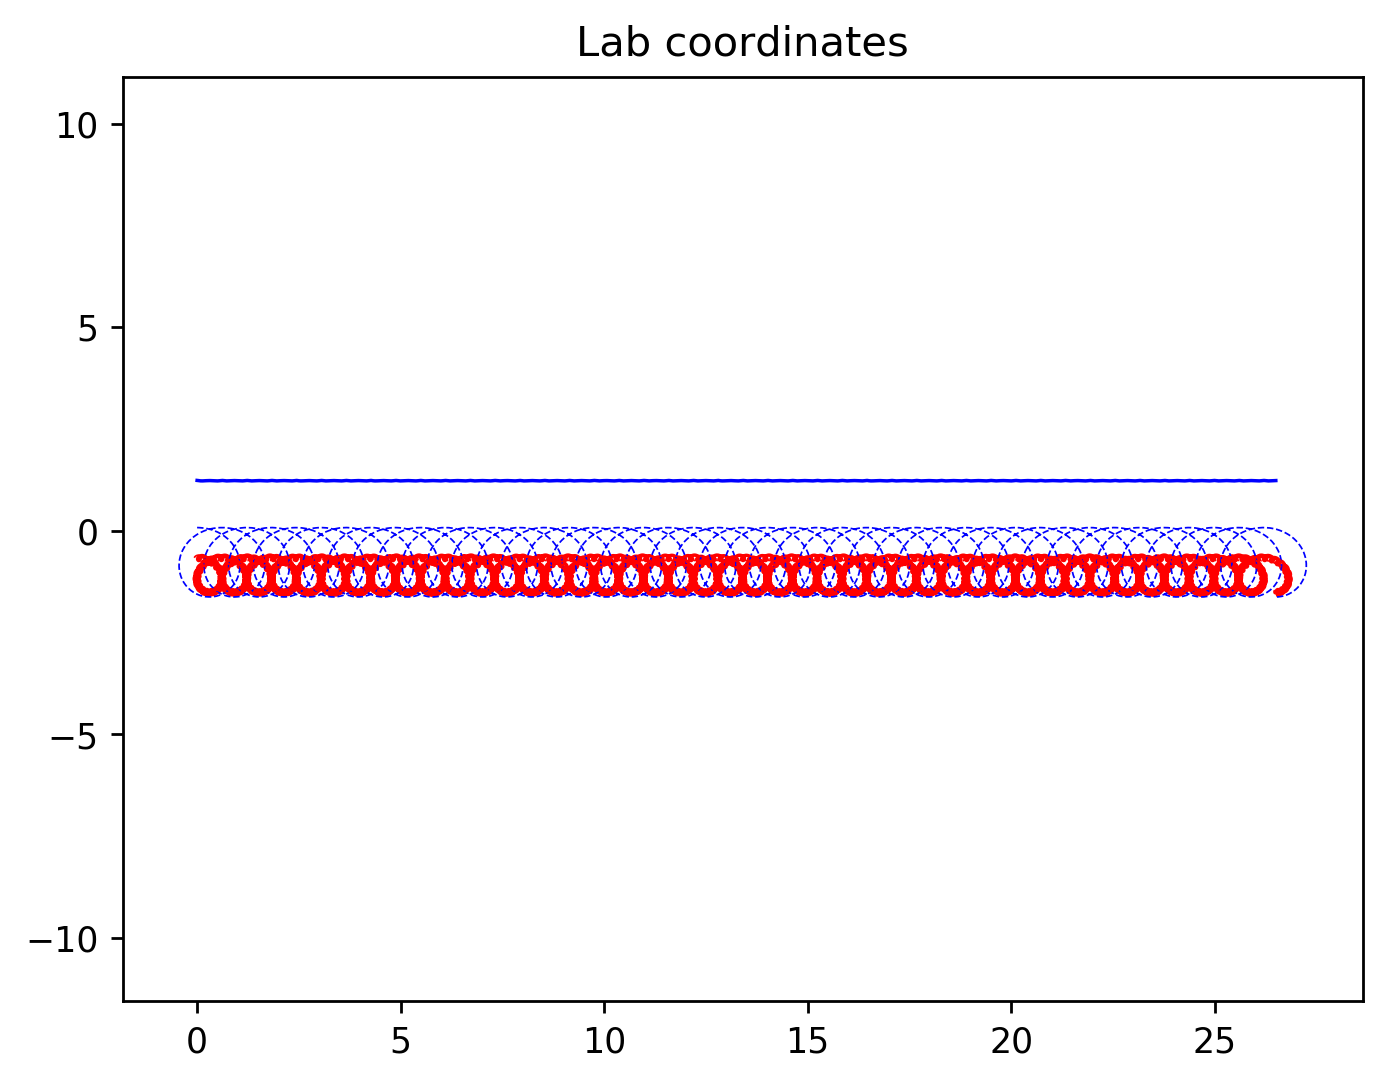

In [32]:
plot_orbits_leapfrog_lab(H,max_time, q2,p2);

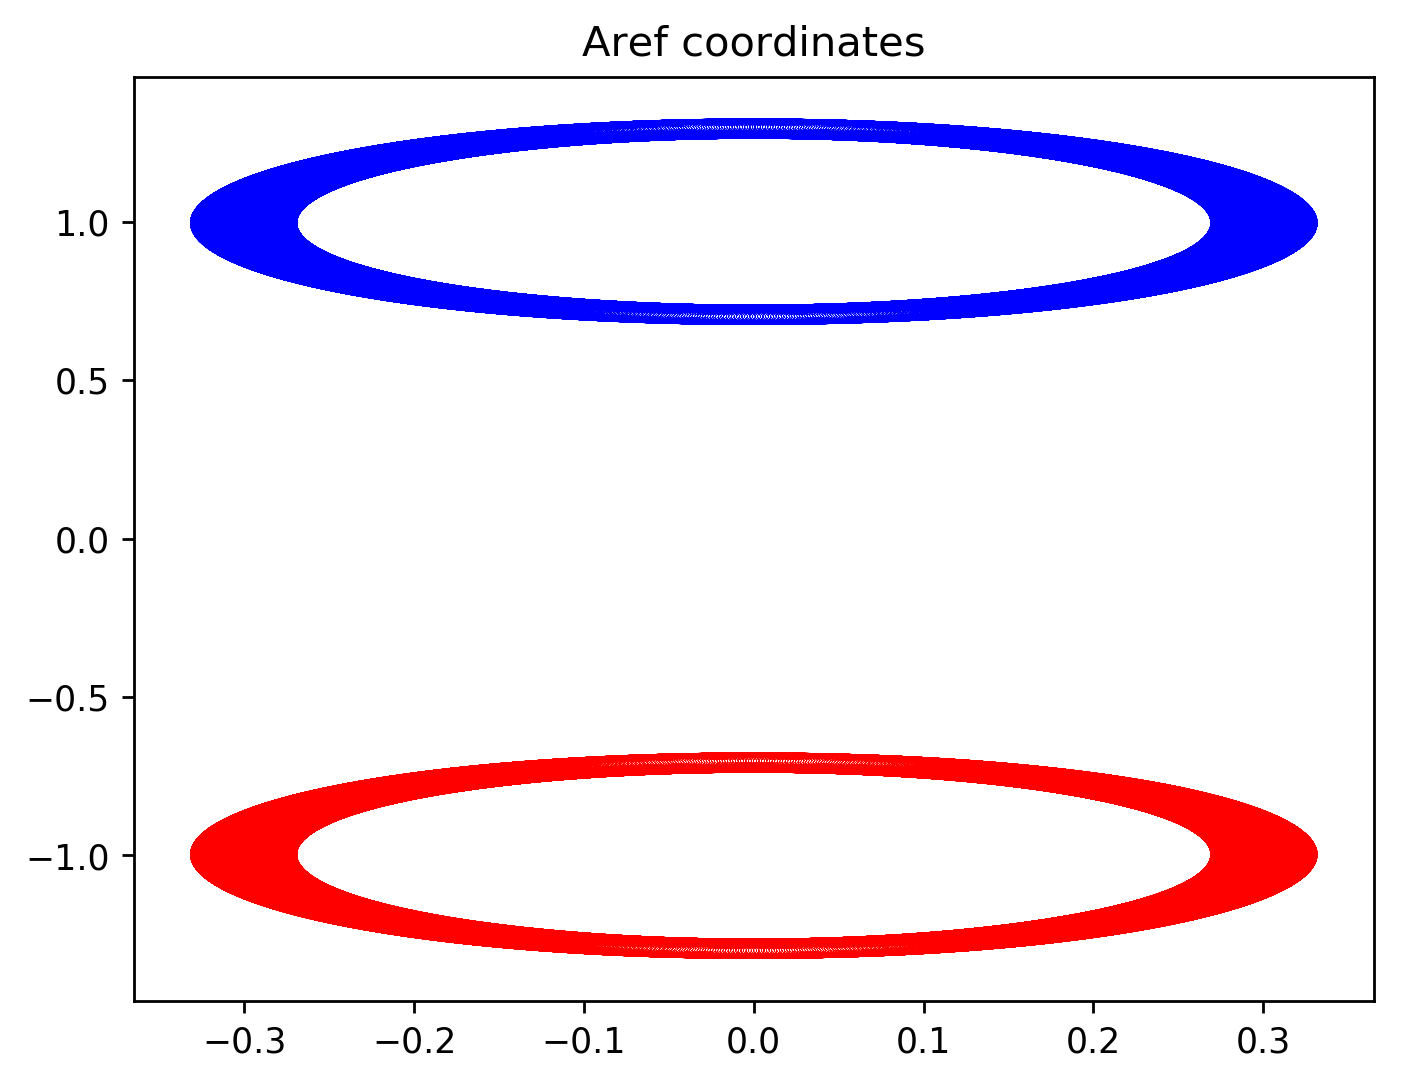

In [33]:
q2=0
p2=1


plot_orbits_leapfrog_aref(H,max_time, q2,p2);

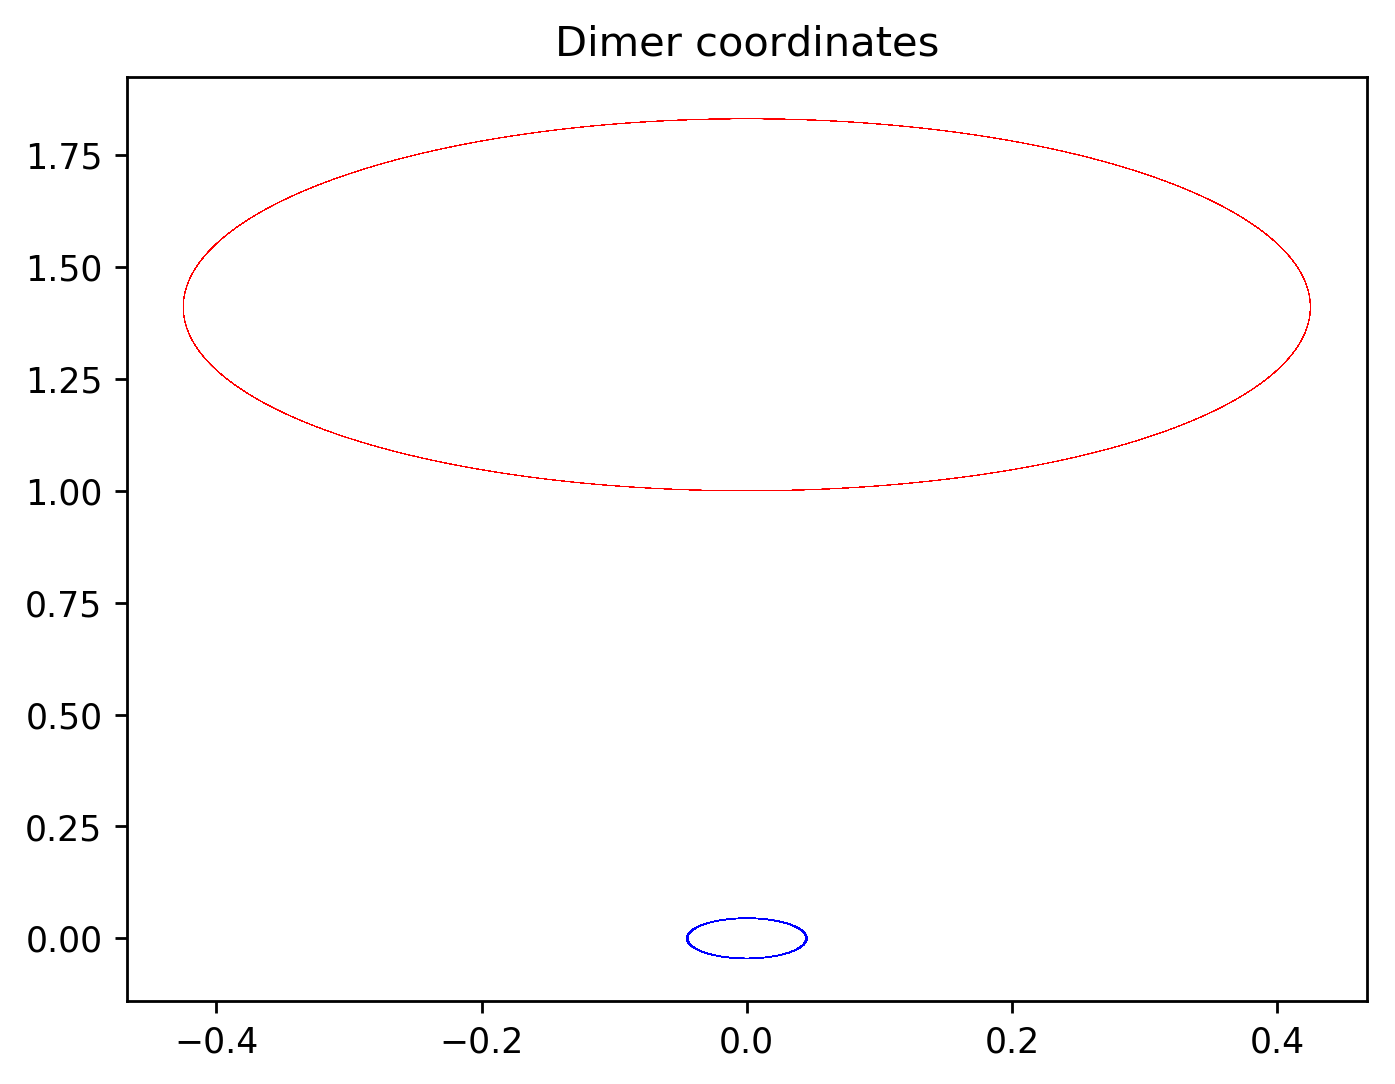

In [35]:
plot_orbits_leapfrog_dimer(H,100, q2,p2);

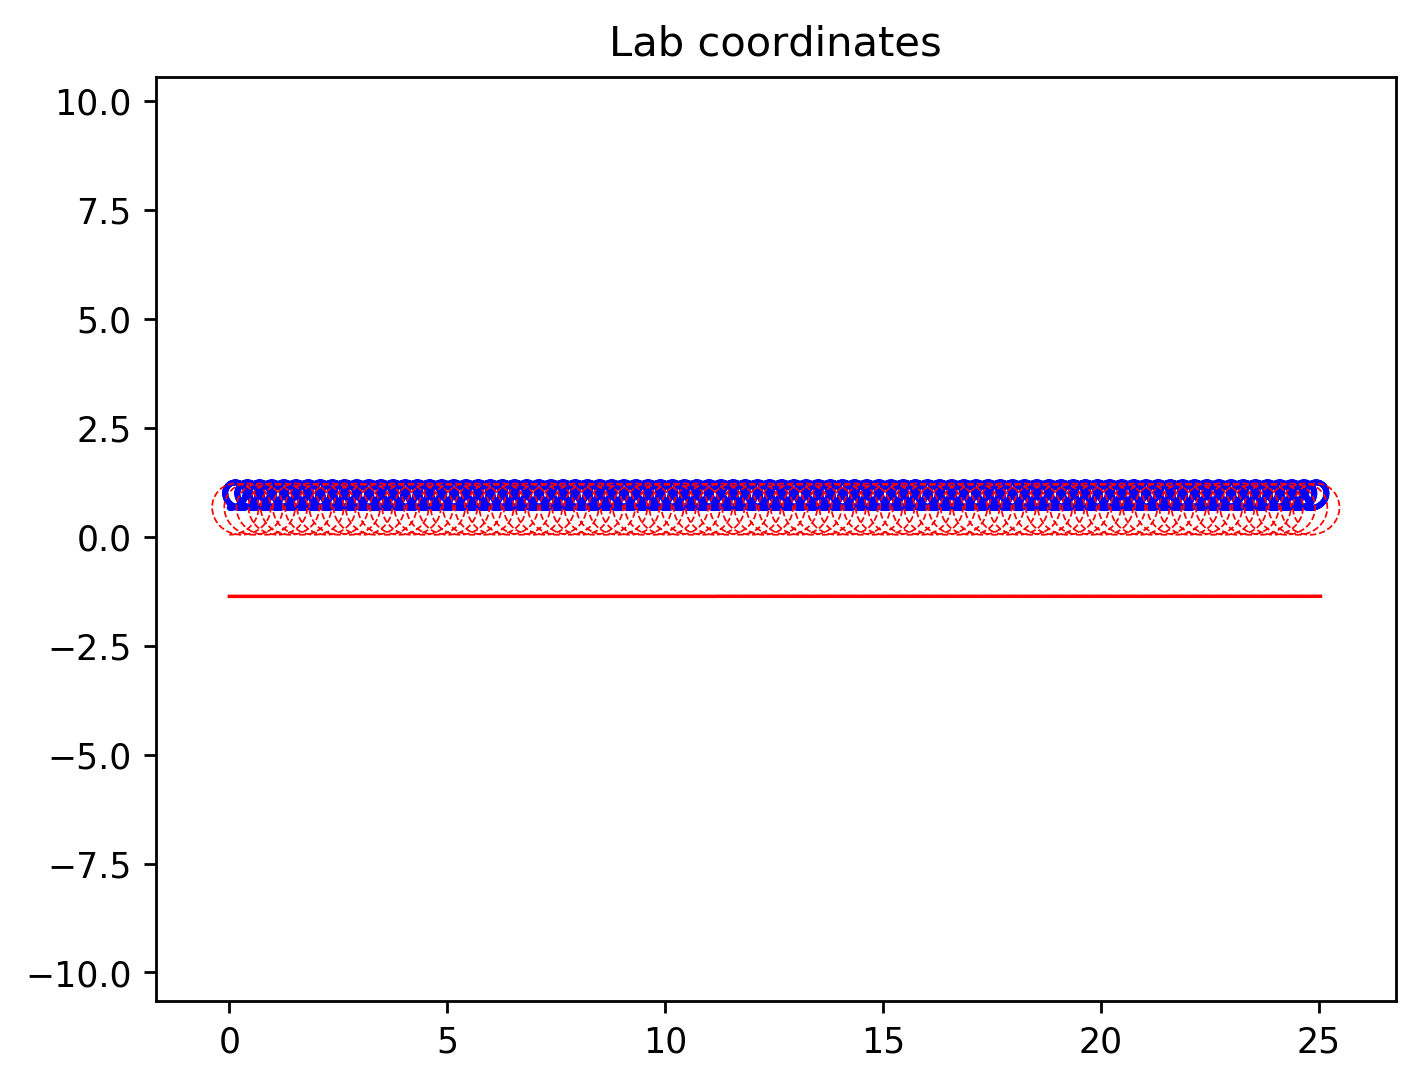

In [36]:
plot_orbits_leapfrog_lab(H,100, q2,p2);

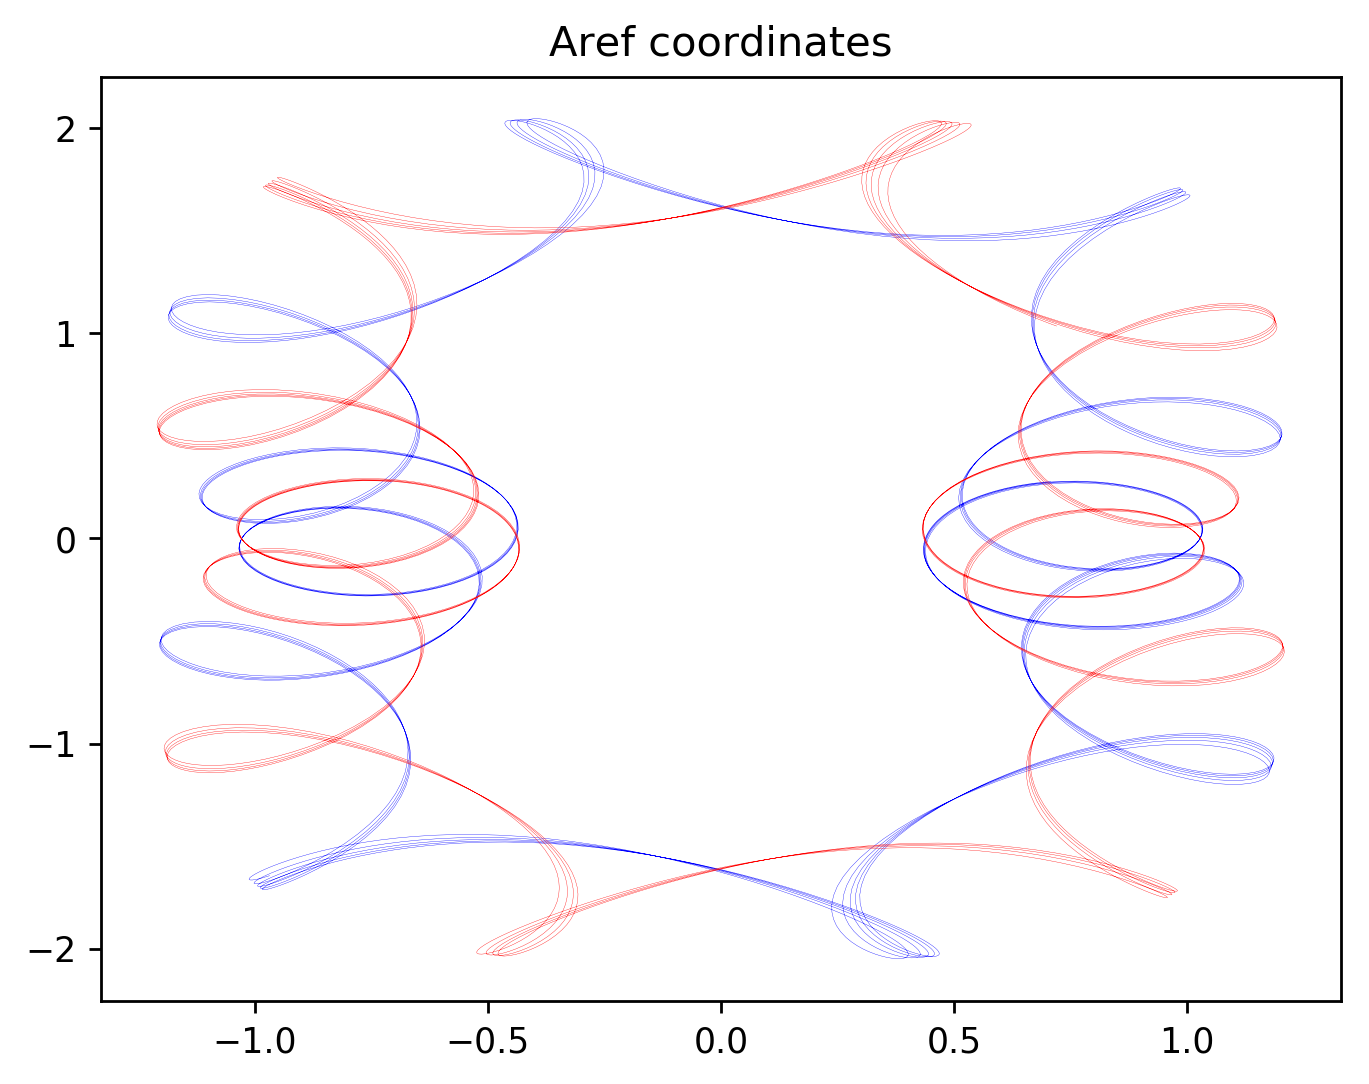

In [37]:
q2=1
p2=0


plot_orbits_leapfrog_aref(H,max_time, q2,p2);

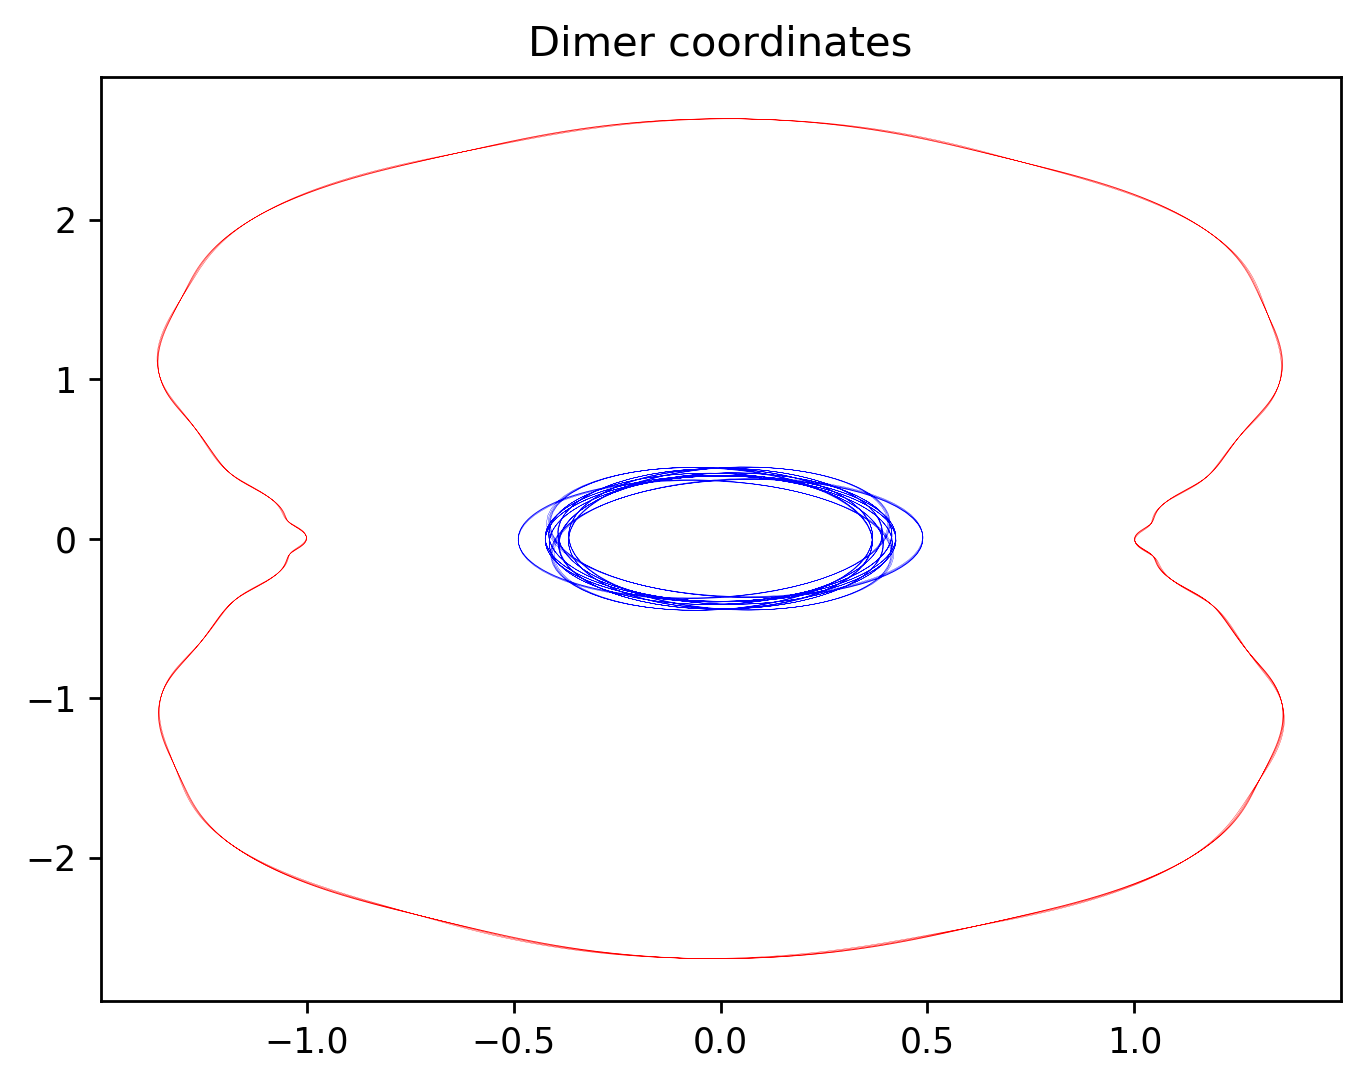

In [38]:
plot_orbits_leapfrog_dimer(H,max_time, q2,p2);

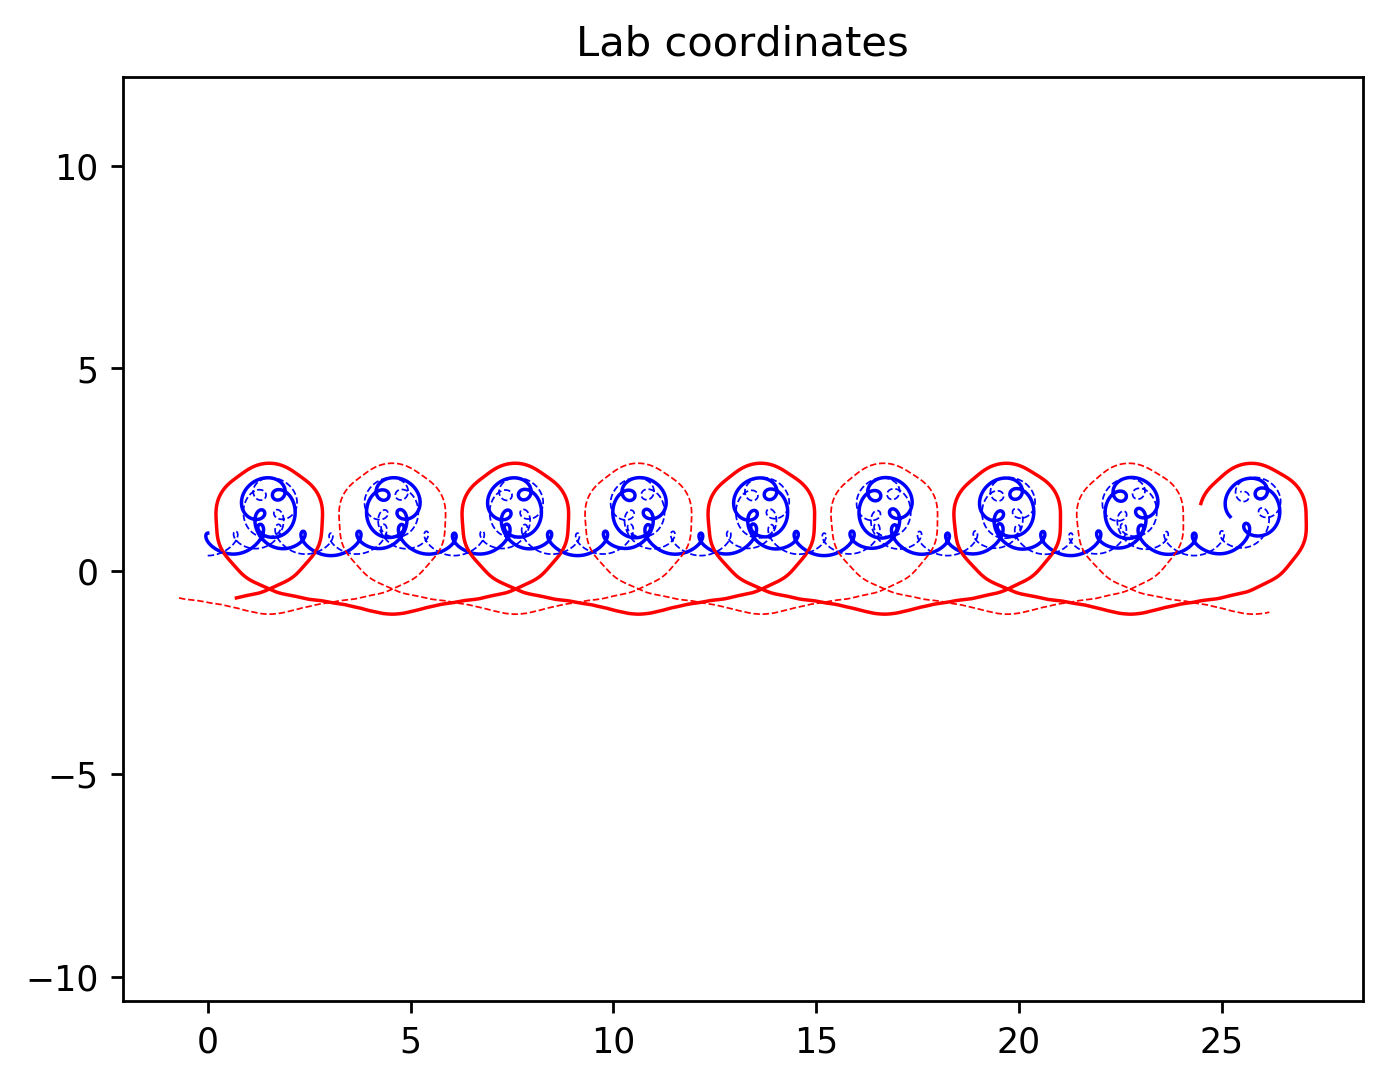

In [40]:
plot_orbits_leapfrog_lab(H,max_time, q2,p2);

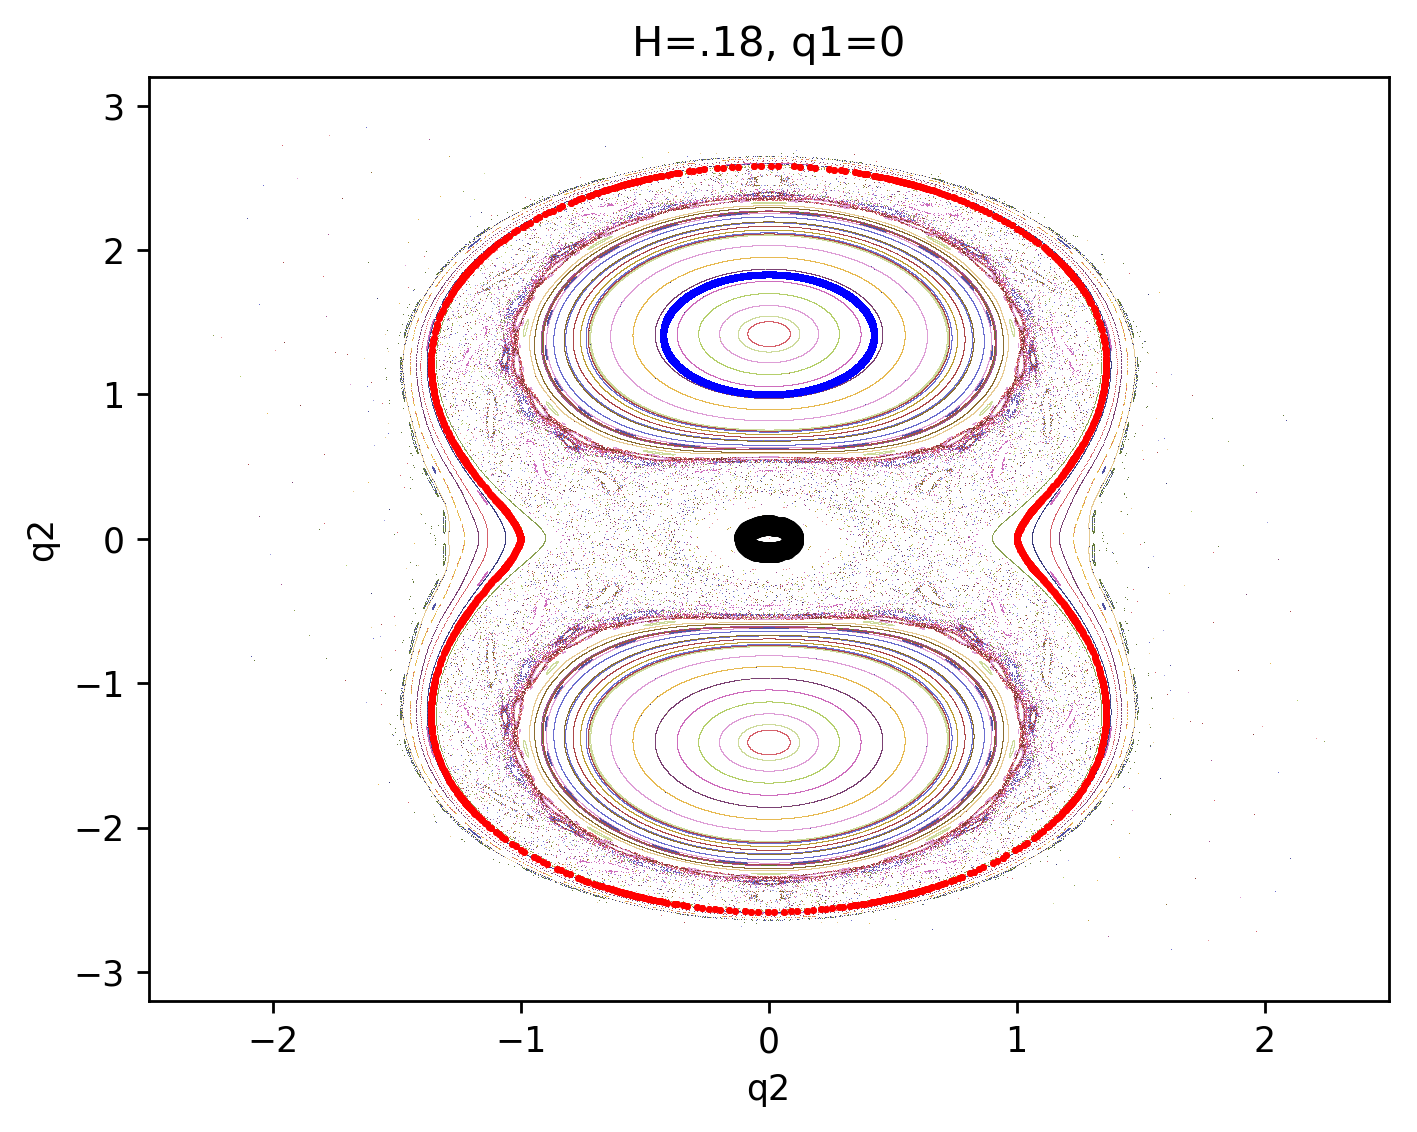

(-3.2, 3.2)

In [41]:

@load "DIMER_PSS_X0_180000000000000_51_7.bson" SAVE_DATA

Brandons_Colors=["#393b79" ,"#5254a3","#6b6ecf","#9c9ede" ,"#637939","#8ca252" ,"#b5cf6b" ,"#cedb9c" ,"#8c6d31","#bd9e39" ,"#e7ba52","#e7cb94","#843c39","#ad494a" ,"#d6616b","#e7969c" ,"#7b4173" ,"#a55194","#ce6dbd" ,"#de9ed6"];
color_counter=0
figure(dpi=250)
for c in keys(SAVE_DATA)
    global color_counter
    color_counter+=1
    Q_PSS,P_PSS=SAVE_DATA[c]
    current_color=Brandons_Colors[mod(color_counter,length(Brandons_Colors))+1]
    plot(Q_PSS,P_PSS,",",c=current_color);
    plot(-Q_PSS,-P_PSS,",",c=current_color);

end

Q_PSS,P_PSS=PSS_function(.1, 0, H, 11000);
plot(Q_PSS,P_PSS, ".",markersize=10,c="k");
Q_PSS,P_PSS=PSS_function(0, 1, H,10000);
plot(Q_PSS,P_PSS, ".",markersize=2,c="b");
Q_PSS,P_PSS=PSS_function(1, 0, H,10000);
plot(Q_PSS,P_PSS, ".",markersize=2,c="r");

xlabel("q2")
ylabel("q2")
title("H=.18, q1=0")
xlim(-2.5,2.5) 
ylim(-3.2,3.2) 